🏙️ City Energy Consumption Analysis & Prediction System

📊 Generating Synthetic Dataset...
✅ Dataset generated: 1830 records for 5 zones over 366 days

📋 Dataset Overview:
Shape: (1830, 6)
Date range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00
Zones: ['ZONE_001' 'ZONE_002' 'ZONE_003' 'ZONE_004' 'ZONE_005']

First 10 rows:
        Date    ZoneID  AvgTemperature  Humidity  SpecialEvent  \
0 2024-01-01  ZONE_001             1.8      75.5             0   
1 2024-01-01  ZONE_002             1.8      75.5             0   
2 2024-01-01  ZONE_003             1.8      75.5             0   
3 2024-01-01  ZONE_004             1.8      75.5             0   
4 2024-01-01  ZONE_005             1.8      75.5             0   
5 2024-01-02  ZONE_001            -1.2      73.5             0   
6 2024-01-02  ZONE_002            -1.2      73.5             0   
7 2024-01-02  ZONE_003            -1.2      73.5             0   
8 2024-01-02  ZONE_004            -1.2      73.5             0   
9 2024-01-02  ZO

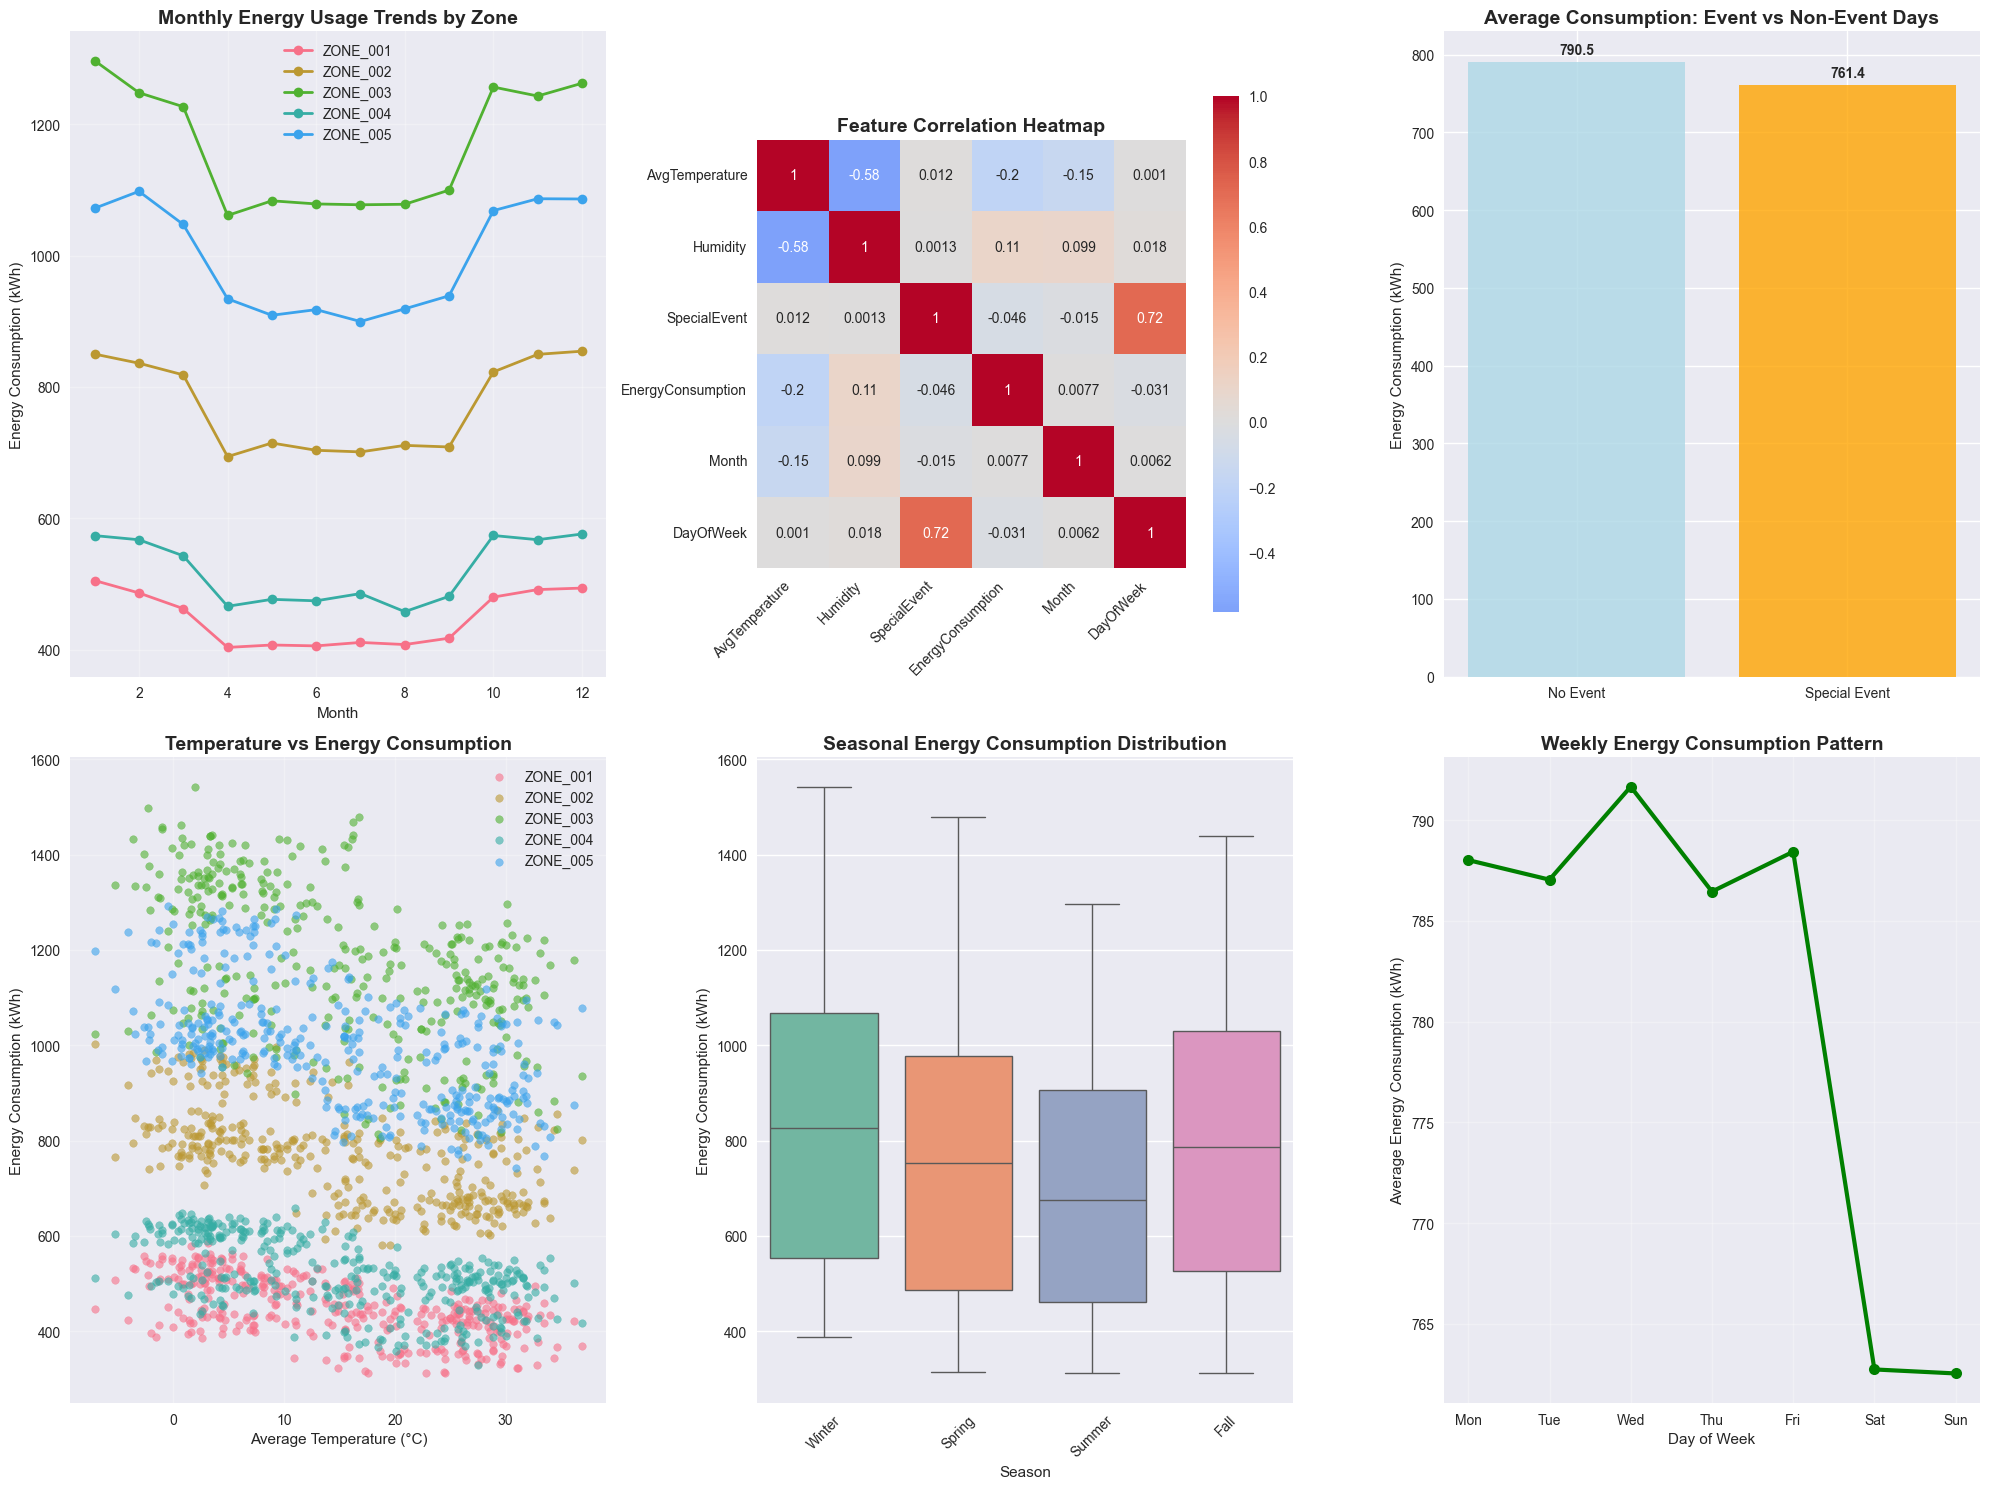

✅ Static visualizations created successfully!

🌟 Creating Interactive Visualizations...


✅ Interactive visualizations created successfully!

🤖 Building and Evaluating ML Models...

🔧 Training Linear Regression...
📊 Linear Regression Results:
   Mean Absolute Error: 72.05 kWh
   R² Score: 0.8992

🔧 Training Random Forest...
📊 Random Forest Results:
   Mean Absolute Error: 35.08 kWh
   R² Score: 0.9725

🎯 Random Forest Feature Importance:
   Zone_ZONE_003: 0.4339
   Zone_ZONE_005: 0.2925
   Zone_ZONE_002: 0.1268
   SpecialEvent: 0.0696
   AvgTemperature: 0.0559
   Humidity: 0.0071
   Month: 0.0054
   Zone_ZONE_001: 0.0031
   Zone_ZONE_004: 0.0029
   DayOfWeek: 0.0029


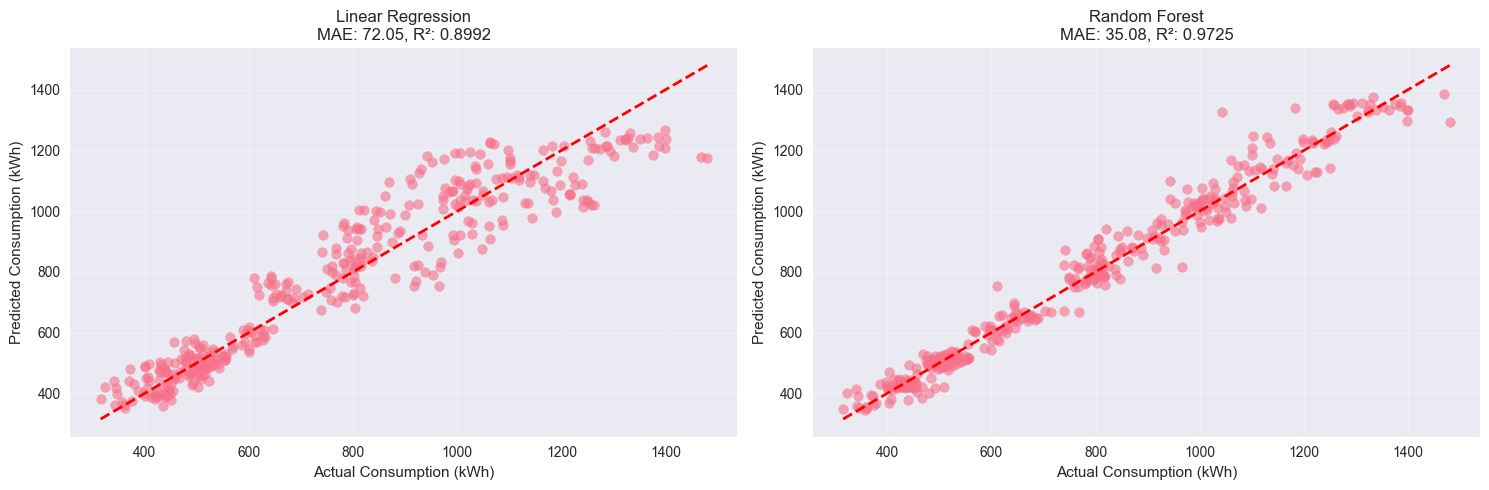


📋 SYSTEM SUMMARY & INSIGHTS

📊 Dataset Statistics:
   • Total Records: 1,830
   • Date Range: 2024-01-01 to 2024-12-31
   • Number of Zones: 5
   • Average Daily Consumption: 781.02 kWh
   • Peak Consumption: 1542.35 kWh
   • Special Event Days: 595 (32.5%)

🎯 Key Insights:
   • Temperature-Consumption Correlation: -0.198
   • Highest Consuming Zone: ZONE_003 (1167.58 kWh avg)
   • Lowest Consuming Zone: ZONE_001 (447.62 kWh avg)
   • Peak Consumption Season: Winter (853.80 kWh avg)
   • Special Event Impact: -3.7% consumption change

🤖 Model Performance:
   • Linear Regression:
     - Mean Absolute Error: 72.05 kWh
     - R² Score: 0.8992 (89.9% variance explained)
   • Random Forest:
     - Mean Absolute Error: 35.08 kWh
     - R² Score: 0.9725 (97.3% variance explained)
   • Best Performing Model: Random Forest (MAE: 35.08 kWh)

💡 Recommendations:
   • Monitor ZONE_003 closely as it shows highest consumption
   • Plan for increased demand during Winter season
   • Consider load bal

In [1]:
# City Energy Consumption Analysis & Prediction System
# A comprehensive system for analyzing and predicting daily electricity usage patterns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🏙️ City Energy Consumption Analysis & Prediction System")
print("=" * 60)

# =============================================================================
# 1. DATA GENERATION
# =============================================================================

def generate_synthetic_dataset():
    """
    Generate realistic synthetic energy consumption data for 5 city zones over 1 year.
    
    Returns:
        pd.DataFrame: Dataset with Date, ZoneID, AvgTemperature, Humidity, 
                     SpecialEvent, and EnergyConsumption columns
    """
    print("\n📊 Generating Synthetic Dataset...")
    
    # Date range for 1 year
    start_date = '2024-01-01'
    end_date = '2024-12-31'
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Zone definitions with different characteristics
    zones = {
        'ZONE_001': {'type': 'Residential', 'base_consumption': 450, 'temp_sensitivity': 15},
        'ZONE_002': {'type': 'Commercial', 'base_consumption': 680, 'temp_sensitivity': 25},
        'ZONE_003': {'type': 'Industrial', 'base_consumption': 1200, 'temp_sensitivity': 10},
        'ZONE_004': {'type': 'Mixed', 'base_consumption': 520, 'temp_sensitivity': 18},
        'ZONE_005': {'type': 'Downtown', 'base_consumption': 890, 'temp_sensitivity': 22}
    }
    
    data = []
    np.random.seed(42)  # For reproducible results
    
    for date in dates:
        # Seasonal temperature pattern
        day_of_year = date.timetuple().tm_yday
        base_temp = 15 + 15 * np.sin(2 * np.pi * (day_of_year - 80) / 365)
        daily_temp = base_temp + np.random.normal(0, 3)
        
        # Humidity pattern (inverse relationship with temperature)
        humidity = max(30, min(90, 70 - 0.5 * (daily_temp - 15) + np.random.normal(0, 8)))
        
        # Special events (weekends, holidays, festivals) - about 15% of days
        is_weekend = date.weekday() >= 5
        is_special = 1 if (is_weekend or np.random.random() < 0.05) else 0
        
        for zone_id, zone_info in zones.items():
            # Base consumption varies by zone type
            base_consumption = zone_info['base_consumption']
            temp_sensitivity = zone_info['temp_sensitivity']
            
            # Temperature effect (higher consumption in extreme temperatures)
            temp_effect = temp_sensitivity * abs(daily_temp - 22) / 10
            
            # Weekend/holiday effect (different for each zone type)
            event_multiplier = 1.2 if zone_info['type'] in ['Commercial', 'Downtown'] and is_special else 0.8 if is_special else 1.0
            
            # Seasonal effect
            seasonal_factor = 1.1 if day_of_year < 90 or day_of_year > 270 else 0.95  # Winter vs Summer
            
            # Random noise
            noise = np.random.normal(0, base_consumption * 0.05)
            
            # Calculate final consumption
            consumption = base_consumption * event_multiplier * seasonal_factor + temp_effect + noise
            consumption = max(100, consumption)  # Minimum consumption threshold
            
            data.append({
                'Date': date,
                'ZoneID': zone_id,
                'AvgTemperature': round(daily_temp, 1),
                'Humidity': round(humidity, 1),
                'SpecialEvent': is_special,
                'EnergyConsumption': round(consumption, 2)
            })
    
    df = pd.DataFrame(data)
    print(f"✅ Dataset generated: {len(df)} records for {len(zones)} zones over {len(dates)} days")
    return df

# Generate the dataset
df = generate_synthetic_dataset()

# Display basic information
print(f"\n📋 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Zones: {df['ZoneID'].unique()}")
print("\nFirst 10 rows:")
print(df.head(10))

# =============================================================================
# 2. DATA CLEANING AND PREPROCESSING
# =============================================================================

def clean_and_preprocess_data(df):
    """
    Clean and preprocess the energy consumption dataset.
    
    Args:
        df (pd.DataFrame): Raw dataset
        
    Returns:
        pd.DataFrame: Cleaned and preprocessed dataset
    """
    print("\n🧹 Cleaning and Preprocessing Data...")
    
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.any():
        print(f"Missing values found:\n{missing_values}")
        # Fill missing values if any
        df = df.fillna(method='forward').fillna(method='backward')
    else:
        print("✅ No missing values found")
    
    # Add derived features
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['DayOfYear'] = df['Date'].dt.dayofyear
    df['Season'] = df['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                    3: 'Spring', 4: 'Spring', 5: 'Spring',
                                    6: 'Summer', 7: 'Summer', 8: 'Summer',
                                    9: 'Fall', 10: 'Fall', 11: 'Fall'})
    
    # Temperature categories
    df['TempCategory'] = pd.cut(df['AvgTemperature'], 
                               bins=[-np.inf, 10, 20, 30, np.inf],
                               labels=['Cold', 'Cool', 'Warm', 'Hot'])
    
    print(f"✅ Data preprocessing complete. New shape: {df.shape}")
    return df

# Clean and preprocess the data
df_clean = clean_and_preprocess_data(df)

# =============================================================================
# 3. DATA ANALYSIS
# =============================================================================

def perform_data_analysis(df):
    """
    Perform comprehensive analysis of energy consumption patterns.
    
    Args:
        df (pd.DataFrame): Cleaned dataset
    """
    print("\n🔍 Performing Data Analysis...")
    
    # Monthly consumption analysis
    monthly_consumption = df.groupby(['Month', 'ZoneID'])['EnergyConsumption'].mean().unstack()
    print("\n📊 Average Monthly Consumption by Zone (kWh):")
    print(monthly_consumption.round(2))
    
    # Zone-wise statistics
    zone_stats = df.groupby('ZoneID').agg({
        'EnergyConsumption': ['mean', 'std', 'min', 'max'],
        'AvgTemperature': 'mean',
        'Humidity': 'mean',
        'SpecialEvent': 'sum'
    }).round(2)
    zone_stats.columns = ['_'.join(col).strip() for col in zone_stats.columns.values]
    print(f"\n📊 Zone-wise Statistics:")
    print(zone_stats)
    
    # Correlation analysis
    correlation_features = ['AvgTemperature', 'Humidity', 'SpecialEvent', 'EnergyConsumption', 'Month', 'DayOfWeek']
    correlation_matrix = df[correlation_features].corr()
    print(f"\n📊 Feature Correlations:")
    print(correlation_matrix.round(3))
    
    # Special events analysis
    event_analysis = df.groupby(['SpecialEvent', 'ZoneID'])['EnergyConsumption'].mean().unstack()
    print(f"\n📊 Average Consumption: Event vs Non-Event Days:")
    print(event_analysis.round(2))
    
    return monthly_consumption, zone_stats, correlation_matrix, event_analysis

# Perform analysis
monthly_consumption, zone_stats, correlation_matrix, event_analysis = perform_data_analysis(df_clean)

# =============================================================================
# 4. VISUALIZATION
# =============================================================================

def create_visualizations(df, monthly_consumption, correlation_matrix, event_analysis):
    """
    Create comprehensive visualizations of energy consumption patterns.
    
    Args:
        df (pd.DataFrame): Cleaned dataset
        monthly_consumption (pd.DataFrame): Monthly consumption data
        correlation_matrix (pd.DataFrame): Correlation matrix
        event_analysis (pd.DataFrame): Event analysis data
    """
    print("\n📈 Creating Visualizations...")
    
    # Set up the plotting area
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Monthly Energy Usage Trends (Line Chart)
    plt.subplot(2, 3, 1)
    for zone in monthly_consumption.columns:
        plt.plot(monthly_consumption.index, monthly_consumption[zone], 
                marker='o', linewidth=2, label=zone)
    plt.title('Monthly Energy Usage Trends by Zone', fontsize=14, fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Energy Consumption (kWh)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. Correlation Heatmap
    plt.subplot(2, 3, 2)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, cbar_kws={'shrink': 0.8})
    plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    
    # 3. Event vs Non-Event Days Comparison (Bar Chart)
    plt.subplot(2, 3, 3)
    event_comparison = event_analysis.mean(axis=1)
    bars = plt.bar(['No Event', 'Special Event'], event_comparison.values, 
                   color=['lightblue', 'orange'], alpha=0.8)
    plt.title('Average Consumption: Event vs Non-Event Days', fontsize=14, fontweight='bold')
    plt.ylabel('Energy Consumption (kWh)')
    # Add value labels on bars
    for bar, value in zip(bars, event_comparison.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                f'{value:.1f}', ha='center', fontweight='bold')
    
    # 4. Temperature vs Energy Consumption Scatter
    plt.subplot(2, 3, 4)
    for zone in df['ZoneID'].unique():
        zone_data = df[df['ZoneID'] == zone]
        plt.scatter(zone_data['AvgTemperature'], zone_data['EnergyConsumption'], 
                   alpha=0.6, label=zone, s=30)
    plt.title('Temperature vs Energy Consumption', fontsize=14, fontweight='bold')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Energy Consumption (kWh)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 5. Seasonal Consumption Box Plot
    plt.subplot(2, 3, 5)
    sns.boxplot(data=df, x='Season', y='EnergyConsumption', palette='Set2')
    plt.title('Seasonal Energy Consumption Distribution', fontsize=14, fontweight='bold')
    plt.ylabel('Energy Consumption (kWh)')
    plt.xticks(rotation=45)
    
    # 6. Weekly Pattern
    plt.subplot(2, 3, 6)
    weekly_pattern = df.groupby('DayOfWeek')['EnergyConsumption'].mean()
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    plt.plot(days, weekly_pattern.values, marker='o', linewidth=3, markersize=8, color='green')
    plt.title('Weekly Energy Consumption Pattern', fontsize=14, fontweight='bold')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Energy Consumption (kWh)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Static visualizations created successfully!")
    
    # Interactive Plotly visualizations
    create_interactive_visualizations(df, monthly_consumption)

def create_interactive_visualizations(df, monthly_consumption):
    """Create interactive Plotly visualizations."""
    print("\n🌟 Creating Interactive Visualizations...")
    
    # Interactive monthly trends
    fig1 = go.Figure()
    for zone in monthly_consumption.columns:
        fig1.add_trace(go.Scatter(
            x=monthly_consumption.index,
            y=monthly_consumption[zone],
            mode='lines+markers',
            name=zone,
            line=dict(width=3),
            marker=dict(size=8)
        ))
    
    fig1.update_layout(
        title='Interactive Monthly Energy Usage Trends',
        xaxis_title='Month',
        yaxis_title='Energy Consumption (kWh)',
        hovermode='x unified',
        height=500
    )
    fig1.show()
    
    # Interactive zone comparison
    fig2 = px.box(df, x='ZoneID', y='EnergyConsumption', 
                  title='Energy Consumption Distribution by Zone',
                  color='ZoneID')
    fig2.update_layout(height=500, showlegend=False)
    fig2.show()
    
    print("✅ Interactive visualizations created successfully!")

# Create visualizations
create_visualizations(df_clean, monthly_consumption, correlation_matrix, event_analysis)

# =============================================================================
# 5. MACHINE LEARNING PREDICTION MODEL
# =============================================================================

def prepare_features(df):
    """
    Prepare features for machine learning model.
    
    Args:
        df (pd.DataFrame): Cleaned dataset
        
    Returns:
        tuple: Features (X) and target (y) arrays
    """
    # Select features for the model
    feature_columns = ['AvgTemperature', 'Humidity', 'SpecialEvent', 'Month', 'DayOfWeek']
    
    # Create dummy variables for categorical features
    df_encoded = pd.get_dummies(df, columns=['ZoneID'], prefix='Zone')
    
    # Prepare feature matrix
    zone_columns = [col for col in df_encoded.columns if col.startswith('Zone_')]
    X = df_encoded[feature_columns + zone_columns]
    y = df_encoded['EnergyConsumption']
    
    return X, y, feature_columns + zone_columns

def build_and_evaluate_models(X, y, feature_names):
    """
    Build and evaluate Linear Regression and Random Forest models.
    
    Args:
        X (pd.DataFrame): Feature matrix
        y (pd.Series): Target variable
        feature_names (list): List of feature names
        
    Returns:
        tuple: Trained models and evaluation results
    """
    print("\n🤖 Building and Evaluating ML Models...")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    }
    
    results = {}
    trained_models = {}
    
    for name, model in models.items():
        print(f"\n🔧 Training {name}...")
        
        # Train model
        if name == 'Linear Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {'MAE': mae, 'R2': r2, 'predictions': y_pred}
        trained_models[name] = {'model': model, 'scaler': scaler if name == 'Linear Regression' else None}
        
        print(f"📊 {name} Results:")
        print(f"   Mean Absolute Error: {mae:.2f} kWh")
        print(f"   R² Score: {r2:.4f}")
    
    # Feature importance for Random Forest
    if 'Random Forest' in trained_models:
        rf_model = trained_models['Random Forest']['model']
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print(f"\n🎯 Random Forest Feature Importance:")
        for _, row in feature_importance.head(10).iterrows():
            print(f"   {row['feature']}: {row['importance']:.4f}")
    
    # Create prediction comparison plot
    plt.figure(figsize=(15, 5))
    
    for i, (name, result) in enumerate(results.items(), 1):
        plt.subplot(1, 2, i)
        plt.scatter(y_test, result['predictions'], alpha=0.6)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Consumption (kWh)')
        plt.ylabel('Predicted Consumption (kWh)')
        plt.title(f'{name}\nMAE: {result["MAE"]:.2f}, R²: {result["R2"]:.4f}')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return trained_models, results, X_test, y_test

# Prepare features and build models
X, y, feature_names = prepare_features(df_clean)
trained_models, model_results, X_test, y_test = build_and_evaluate_models(X, y, feature_names)

# =============================================================================
# 6. INTERACTIVE PREDICTION INTERFACE
# =============================================================================

class EnergyPredictionSystem:
    """Interactive system for predicting energy consumption."""
    
    def __init__(self, models, df, feature_names):
        self.models = models
        self.df = df
        self.feature_names = feature_names
        self.zones = sorted(df['ZoneID'].unique())
    
    def validate_inputs(self, zone_id, temperature, humidity, special_event):
        """Validate user inputs."""
        errors = []
        
        if zone_id not in self.zones:
            errors.append(f"Invalid Zone ID. Must be one of: {', '.join(self.zones)}")
        
        if not -50 <= temperature <= 60:
            errors.append("Temperature must be between -50°C and 60°C")
        
        if not 0 <= humidity <= 100:
            errors.append("Humidity must be between 0% and 100%")
        
        if special_event not in [0, 1]:
            errors.append("Special Event must be 0 (No) or 1 (Yes)")
        
        return errors
    
    def prepare_prediction_input(self, zone_id, temperature, humidity, special_event, month=None, day_of_week=None):
        """Prepare input for prediction."""
        if month is None:
            month = 6  # Default to June
        if day_of_week is None:
            day_of_week = 1  # Default to Tuesday
        
        # Create input array
        input_data = [temperature, humidity, special_event, month, day_of_week]
        
        # Add zone dummy variables
        for zone in self.zones:
            input_data.append(1 if zone == zone_id else 0)
        
        return np.array(input_data).reshape(1, -1)
    
    def predict_consumption(self, zone_id, temperature, humidity, special_event, month=None, day_of_week=None):
        """Predict energy consumption for given inputs."""
        # Validate inputs
        errors = self.validate_inputs(zone_id, temperature, humidity, special_event)
        if errors:
            return {"error": errors}
        
        # Prepare input
        input_data = self.prepare_prediction_input(zone_id, temperature, humidity, special_event, month, day_of_week)
        
        predictions = {}
        for model_name, model_info in self.models.items():
            model = model_info['model']
            scaler = model_info['scaler']
            
            if scaler is not None:  # Linear Regression
                input_scaled = scaler.transform(input_data)
                pred = model.predict(input_scaled)[0]
            else:  # Random Forest
                pred = model.predict(input_data)[0]
            
            predictions[model_name] = max(0, pred)  # Ensure non-negative prediction
        
        return {
            "zone_id": zone_id,
            "temperature": temperature,
            "humidity": humidity,
            "special_event": "Yes" if special_event else "No",
            "predictions": predictions,
            "average_prediction": np.mean(list(predictions.values()))
        }
    
    def run_interactive_session(self):
        """Run interactive prediction session."""
        print("\n🎯 Interactive Energy Consumption Prediction System")
        print("=" * 60)
        print(f"Available Zones: {', '.join(self.zones)}")
        print("Enter 'quit' to exit the system")
        
        while True:
            try:
                print("\n" + "-" * 40)
                # Get user inputs
                zone_input = input("Enter Zone ID: ").strip().upper()
                if zone_input.lower() == 'quit':
                    break
                
                temp_input = input("Enter tomorrow's temperature (°C): ").strip()
                if temp_input.lower() == 'quit':
                    break
                
                humidity_input = input("Enter tomorrow's humidity (%): ").strip()
                if humidity_input.lower() == 'quit':
                    break
                
                event_input = input("Special event tomorrow? (0=No, 1=Yes): ").strip()
                if event_input.lower() == 'quit':
                    break
                
                # Convert inputs
                temperature = float(temp_input)
                humidity = float(humidity_input)
                special_event = int(event_input)
                
                # Make prediction
                result = self.predict_consumption(zone_input, temperature, humidity, special_event)
                
                if "error" in result:
                    print(f"\n❌ Input Errors:")
                    for error in result["error"]:
                        print(f"   • {error}")
                else:
                    print(f"\n🎯 Prediction Results for {result['zone_id']}:")
                    print(f"   Temperature: {result['temperature']}°C")
                    print(f"   Humidity: {result['humidity']}%")
                    print(f"   Special Event: {result['special_event']}")
                    print(f"\n📊 Model Predictions:")
                    for model_name, prediction in result['predictions'].items():
                        print(f"   {model_name}: {prediction:.2f} kWh")
                    print(f"\n⭐ Average Prediction: {result['average_prediction']:.2f} kWh")
            
            except ValueError:
                print("❌ Invalid input. Please enter numeric values where required.")
            except KeyboardInterrupt:
                break
            except Exception as e:
                print(f"❌ An error occurred: {str(e)}")
        
        print("\n👋 Thank you for using the Energy Prediction System!")

# Initialize the prediction system
prediction_system = EnergyPredictionSystem(trained_models, df_clean, feature_names)

# =============================================================================
# 7. SYSTEM SUMMARY AND INSIGHTS
# =============================================================================

def generate_system_summary(df, model_results):
    """Generate a comprehensive summary of the analysis and insights."""
    print("\n📋 SYSTEM SUMMARY & INSIGHTS")
    print("=" * 60)
    
    print(f"\n📊 Dataset Statistics:")
    print(f"   • Total Records: {len(df):,}")
    print(f"   • Date Range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
    print(f"   • Number of Zones: {df['ZoneID'].nunique()}")
    print(f"   • Average Daily Consumption: {df['EnergyConsumption'].mean():.2f} kWh")
    print(f"   • Peak Consumption: {df['EnergyConsumption'].max():.2f} kWh")
    print(f"   • Special Event Days: {df['SpecialEvent'].sum()} ({df['SpecialEvent'].mean()*100:.1f}%)")
    
    print(f"\n🎯 Key Insights:")
    
    # Temperature insights
    temp_corr = df[['AvgTemperature', 'EnergyConsumption']].corr().iloc[0, 1]
    print(f"   • Temperature-Consumption Correlation: {temp_corr:.3f}")
    
    # Zone performance
    zone_avg = df.groupby('ZoneID')['EnergyConsumption'].mean()
    highest_zone = zone_avg.idxmax()
    lowest_zone = zone_avg.idxmin()
    print(f"   • Highest Consuming Zone: {highest_zone} ({zone_avg[highest_zone]:.2f} kWh avg)")
    print(f"   • Lowest Consuming Zone: {lowest_zone} ({zone_avg[lowest_zone]:.2f} kWh avg)")
    
    # Seasonal patterns
    seasonal_avg = df.groupby('Season')['EnergyConsumption'].mean()
    peak_season = seasonal_avg.idxmax()
    print(f"   • Peak Consumption Season: {peak_season} ({seasonal_avg[peak_season]:.2f} kWh avg)")
    
    # Event impact
    event_impact = df.groupby('SpecialEvent')['EnergyConsumption'].mean()
    if len(event_impact) > 1:
        impact_pct = ((event_impact[1] - event_impact[0]) / event_impact[0]) * 100
        print(f"   • Special Event Impact: {impact_pct:+.1f}% consumption change")
    
    print(f"\n🤖 Model Performance:")
    for model_name, results in model_results.items():
        print(f"   • {model_name}:")
        print(f"     - Mean Absolute Error: {results['MAE']:.2f} kWh")
        print(f"     - R² Score: {results['R2']:.4f} ({results['R2']*100:.1f}% variance explained)")
    
    best_model = min(model_results.items(), key=lambda x: x[1]['MAE'])
    print(f"   • Best Performing Model: {best_model[0]} (MAE: {best_model[1]['MAE']:.2f} kWh)")
    
    print(f"\n💡 Recommendations:")
    print(f"   • Monitor {highest_zone} closely as it shows highest consumption")
    print(f"   • Plan for increased demand during {peak_season} season")
    print(f"   • Consider load balancing during special events")
    print(f"   • Use {best_model[0]} model for most accurate predictions")

generate_system_summary(df_clean, model_results)

# =============================================================================
# 8. DEMO PREDICTIONS
# =============================================================================

def run_demo_predictions():
    """Run demo predictions to showcase the system."""
    print(f"\n🎬 Demo Predictions")
    print("=" * 30)
    
    demo_scenarios = [
        {"zone": "ZONE_001", "temp": 25, "humidity": 65, "event": 0, "desc": "Normal summer day"},
        {"zone": "ZONE_002", "temp": 5, "humidity": 80, "event": 1, "desc": "Cold winter day with event"},
        {"zone": "ZONE_003", "temp": 30, "humidity": 45, "event": 0, "desc": "Hot day, no event"},
        {"zone": "ZONE_004", "temp": 15, "humidity": 70, "event": 1, "desc": "Mild day with special event"},
        {"zone": "ZONE_005", "temp": 20, "humidity": 55, "event": 0, "desc": "Pleasant spring day"}
    ]
    
    for scenario in demo_scenarios:
        result = prediction_system.predict_consumption(
            scenario["zone"], scenario["temp"], scenario["humidity"], scenario["event"]
        )
        
        print(f"\n🎯 Scenario: {scenario['desc']}")
        print(f"   Zone: {scenario['zone']}, Temp: {scenario['temp']}°C, Humidity: {scenario['humidity']}%, Event: {'Yes' if scenario['event'] else 'No'}")
        print(f"   Predicted Consumption: {result['average_prediction']:.2f} kWh")

run_demo_predictions()

print(f"\n🚀 System Ready!")
print(f"To use the interactive prediction interface, call:")
print(f"prediction_system.run_interactive_session()")